In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

data=pd.read_csv(r'C:\Users\Haider\Downloads\movies.csv')

pd.set_option('display.max_rows',None)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Haider\\Downloads\\movies.csv'

In [ ]:
data.head()

In [60]:
#To check if there is any missing data 

for col in data.columns:
    missing=np.mean(data[col].isnull())
    print('{}: {}%'.format(col, missing)) 

name: 0.0%
rating: 0.0%
genre: 0.0%
year: 0.0%
released: 0.0%
score: 0.0003912363067292645%
votes: 0.0%
director: 0.0%
writer: 0.0%
star: 0.0%
country: 0.0%
budget: 0.0%
gross: 0.0%
company: 0.0%
runtime: 0.0%
Year_correct: 0.0%


In [61]:
#Changing nulls to 0 for budget,votes,runtime and gross

data['budget'] = data['budget'].fillna(0)
data['runtime'] = data['runtime'].fillna(0)
data['votes'] = data['votes'].fillna(0)
data['gross'] = data['gross'].fillna(0)

In [62]:
#Data types of our columns

data.dtypes

name              int16
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes             int64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime           int64
Year_correct       int8
dtype: object

In [63]:
#Changing data types of budgets,votes,runtime and gross from float to integers

data['budget']=data['budget'].astype('int64')
data['runtime']=data['runtime'].astype('int64')
data['votes']=data['votes'].astype('int64')
data['gross']=data['gross'].astype('int64')

In [64]:
#Creating a column, 'correct_year', because the released year and year does not match in the data.

data['Year_correct']=data['released'].astype(str).str[:4]

In [65]:
#Ordering data in ascending value with gross value.

data=data.sort_values(by=['gross'], inplace=False , ascending=False)

<AxesSubplot:xlabel='budget', ylabel='gross'>

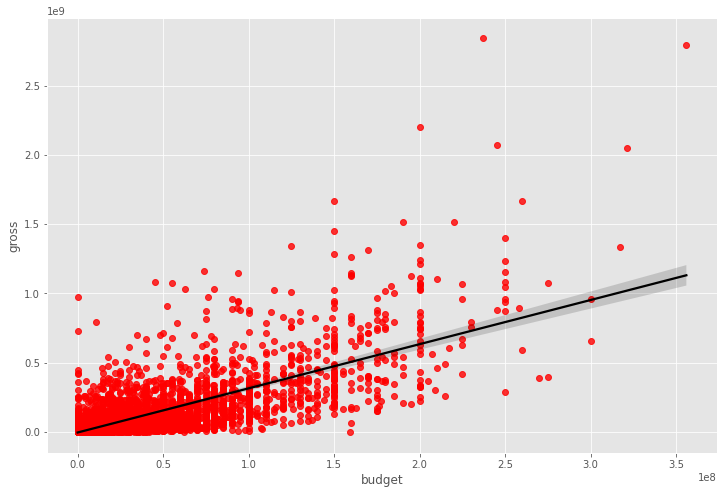

In [66]:
#Scatter plot of budget vs gross using sea-born.

sns.regplot(x='budget',y='gross',data=data, scatter_kws={'color':'red'},line_kws={'color':'black'})

Text(87.0, 0.5, 'Movie Features')

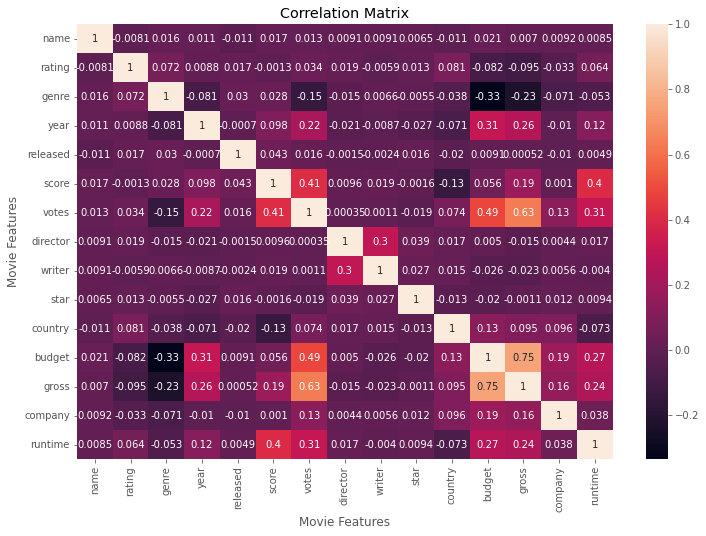

In [67]:
#Visualizing the correlation matrix.

correlation_matrix=data.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [68]:
#Converting the string values into numerical codes.

data_=data
       
data_

for col in data_.columns:
    if data_[col].dtype == 'object':
        data_[col]=data_[col].astype('category')
        data_[col]= data_[col].cat.codes
data_ .head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,3078
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,925
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,3088
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,3080
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,1025


Text(86.09375, 0.5, 'Movie Features')

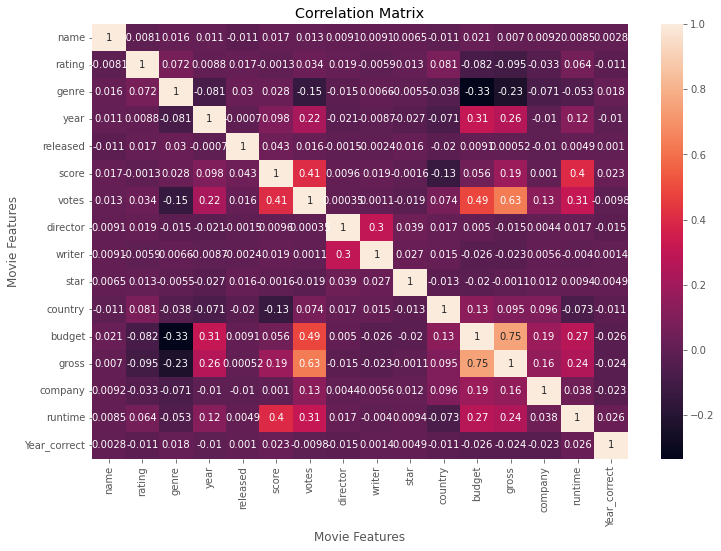

In [69]:
#Visualizing the correlation matrix (including the converted numerized string values).

correlation_matrix=data_.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [70]:
#Unstacking the correlation matrix.

correlation_matrix=data_.corr()
correlational_pairs=correlation_matrix.unstack()
sort_corr=correlational_pairs.sort_values()
sort_corr.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [71]:
#Highly correlated data (greater than 0.5 and less than 1).

high_corr=sort_corr[(sort_corr>0.5) & (sort_corr<1)]
high_corr

gross   votes     0.632870
votes   gross     0.632870
gross   budget    0.750157
budget  gross     0.750157
dtype: float64

In [72]:
#Results:

#The pair of (gross, votes) and (gross, budget) have high correlation (which was unexpected :)).
#Like already shown before, budget and gross have high correlation.
#Company has low correaltion.